In [1]:
from ophyd_async.core import DeviceCollector 
from ophyd_async.epics.motion.motor import Motor
from ophyd_async.core import Device
from ophyd_async.epics.signal import epics_signal_rw
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky import RunEngine
from bluesky.plans import count, scan 
from ophyd.sim import det1
from bluesky import utils
from bluesky.utils import Msg
from dodal.beamlines.beamline_utils import set_directory_provider
from ophyd_async.core._providers import StaticDirectoryProvider
from ophyd_async.epics.signal import (
    epics_signal_r,
    epics_signal_rw,
    epics_signal_x,
)

import asyncio
from epics import caget
loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
import os 
os.chdir("/scratch/wvx67826/p99Bluesky/src/")

In [3]:
from p99Bluesky.devices.p99.sample_stage import SampleAngleStage
from p99Bluesky.devices.stages import XYZStage


In [ ]:
caget('BL99P-MO-STAGE-01:WRITETHETA.EGU')

In [4]:
with DeviceCollector():
    sample_angle_stage = SampleAngleStage('BL99P-MO-STAGE-01:',name = "sample_angle_stage")
#result = asyncio.create_task(x.connect())

In [5]:
result1 = asyncio.create_task(sample_angle_stage.theta.setpoint.get_value())
result2 = asyncio.create_task(sample_angle_stage.roll.read())
result3 = asyncio.create_task(sample_angle_stage.pitch.read())

In [6]:
print(result1,"\n",result2,"\n",result3,"\n", )


<Task finished name='Task-28' coro=<SignalR.get_value() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/signal.py:28> result=0.1> 
 <Task finished name='Task-29' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-roll': {'alarm_severity': 0, 'timestamp': 1713774158.854571, 'value': 0.1}}> 
 <Task finished name='Task-30' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-pitch': {'alarm_severity': 0, 'timestamp': 1713774158.854571, 'value': 0.1}}> 



In [7]:
asyncio.all_tasks(sample_angle_stage.roll.set(0.1))
asyncio.all_tasks(sample_angle_stage.theta.set(0.1))
asyncio.all_tasks(sample_angle_stage.pitch.set(0.1))

set()

In [8]:
print (result1,"\n\n",result2 ,"\n\n",result3)

<Task finished name='Task-28' coro=<SignalR.get_value() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/signal.py:28> result=0.1> 

 <Task finished name='Task-29' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-roll': {'alarm_severity': 0, 'timestamp': 1713774158.854571, 'value': 0.1}}> 

 <Task finished name='Task-30' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-pitch': {'alarm_severity': 0, 'timestamp': 1713774158.854571, 'value': 0.1}}>




Transient Scan ID: 1     Time: 2024-04-22 10:15:07
Persistent Unique Scan ID: '0dbc9cf6-2322-4867-9b03-4c57075dd123'
New stream: 'primary'
+-----------+------------+--------------------------+--------------------------+-------------------------+
|   seq_num |       time | sample_angle_stage-pitch | sample_angle_stage-theta | sample_angle_stage-roll |
+-----------+------------+--------------------------+--------------------------+-------------------------+
|         1 | 10:15:07.3 |                    0.100 |                    0.100 |                   0.100 |
|         2 | 10:15:07.8 |                    0.100 |                    0.100 |                   0.100 |
|         3 | 10:15:08.4 |                    0.100 |                    0.100 |                   0.100 |
|         4 | 10:15:08.9 |                    0.100 |                    0.100 |                   0.100 |
|         5 | 10:15:09.4 |                    0.100 |                    0.100 |                   0.100 |
+--

('0dbc9cf6-2322-4867-9b03-4c57075dd123',)

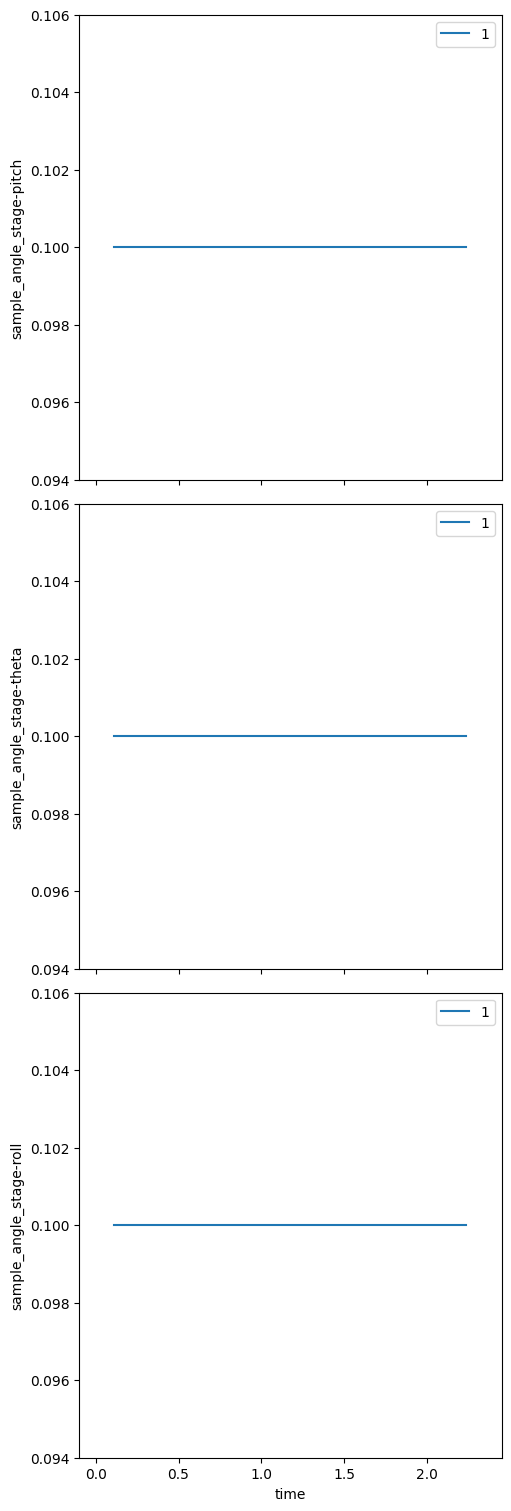

In [9]:
RE(count([sample_angle_stage.theta,sample_angle_stage.roll, sample_angle_stage.pitch],5),bec)

In [ ]:
result1 = asyncio.create_task(sample_angle_stage.roll.read_configuration())
result2 = asyncio.create_task(sample_angle_stage.roll.read_configuration())
result3 = asyncio.create_task(sample_angle_stage.roll.read_configuration())

In [ ]:
xyz_pv = 'BL99P-MO-STAGE-02:'

In [ ]:
with DeviceCollector():
    sample_xyz_stage =XYZStage(xyz_pv,"sample_xyz_stage")

In [ ]:
sample_xyz_stage.x.setpoint = epics_signal_rw(float, xyz_pv + "X")
sample_xyz_stage.y.setpoint = epics_signal_rw(float, xyz_pv + "Y")
sample_xyz_stage.z.setpoint = epics_signal_rw(float, xyz_pv + "Z")
asyncio.create_task(sample_xyz_stage.x.connect())
asyncio.create_task(sample_xyz_stage.y.connect())
asyncio.create_task(sample_xyz_stage.z.connect())

In [ ]:
result1 = asyncio.create_task(sample_xyz_stage.x.read())
result2 = asyncio.create_task(sample_xyz_stage.y.read())
result3 = asyncio.create_task(sample_xyz_stage.z.read())

In [ ]:
print(result1,"\n",result2,"\n",result3,"\n", )

In [ ]:
result1 = asyncio.create_task(sample_xyz_stage.x.read_configuration())
result2 = asyncio.create_task(sample_xyz_stage.y.read_configuration())
result3 = asyncio.create_task(sample_xyz_stage.z.read_configuration())

In [ ]:
print(result1,"\n",result2,"\n",result3,"\n", )

In [ ]:
RE(count([sample_xyz_stage.x, sample_xyz_stage.y, sample_xyz_stage.z ],3),bec)